<a href="https://colab.research.google.com/github/ccaballeroh/Causalidad_B22/blob/main/code/examples/python_packages/Identifiability_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install causaleffect
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Using Algorithms for Identifiability

There is a well-known R package named [`causaleffect`](https://github.com/santikka/causaleffect/) (see the package vignettes at [CRAN](https://cran.r-project.org/web/packages/causaleffect/index.html) and the [paper](https://www.jstatsoft.org/article/view/v076i12)) that implements algorithms for conditional causal effects identification, algorithms for transportability, and selection bias recovery.

In case using R is not an option, there's this [Python package](https://github.com/pedemonte96/causaleffect) with the same name (see the paper [Algorithmic Causal Effect Identification with `causaleffect`](https://arxiv.org/abs/2107.04632)).

Let's use this package to get the front-door adjustment formula automatically.

In [35]:
import causaleffect

In [36]:
G = causaleffect.createGraph(['X<->Y', 'X->Z', 'Z->Y'])

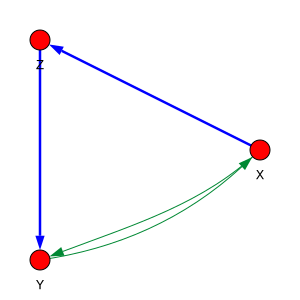

In [37]:
causaleffect.plotGraph(G)

With our DAG defined, we can use the function `ID` to a $\LaTeX$ expression with the _estimand_. 

In [38]:
Q = causaleffect.ID({'Y'}, {'X'}, G)
Q.printLatex()

'\\sum_{z}P(z|x)\\left(\\sum_{x}P(x)P(y|x, z)\\right)'

So, we finally can display this expression and see that agrees with the front-door adjustment formula.

$$P(Y=y|\mathrm{do}(X=x)) = \sum_{z}P(z|x)\left(\sum_{x}P(x)P(y|x, z)\right)$$